In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [18]:
df=pd.read_csv('../input/titanic-dataset/Titanic-Dataset.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.convert_dtypes().dtypes

PassengerId      Int64
Survived         Int64
Pclass           Int64
Name            string
Sex             string
Age            Float64
SibSp            Int64
Parch            Int64
Ticket          string
Fare           Float64
Cabin           string
Embarked        string
dtype: object

In [20]:
df=df.dropna()
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [22]:
df.drop('Name',axis=1,inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S


In [23]:
df.shape

(183, 11)

In [24]:
df.Embarked.unique().tolist()

['C', 'S', 'Q']

In [25]:
label_encoder=LabelEncoder()
df['Embarked']=label_encoder.fit_transform(df['Embarked'])
df['Embarked'].head(15)
#2=S,1=Q,0=C

1     0
3     2
6     2
10    2
11    2
21    2
23    2
27    2
52    0
54    0
62    2
66    2
75    2
88    2
92    2
Name: Embarked, dtype: int64

In [26]:
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Sex'].head(5)
# 1= MALE ,0=Female

1     0
3     0
6     1
10    0
11    0
Name: Sex, dtype: int64

In [27]:
bins=[0,15,24,35,65]
labels=['Child','Young','Adult','Senior']
df['Age_group'] = pd.cut(df['Age'], bins, labels=labels)
df['Age_group'].head()

1     Senior
3      Adult
6     Senior
10     Child
11    Senior
Name: Age_group, dtype: category
Categories (4, object): ['Child' < 'Young' < 'Adult' < 'Senior']

In [28]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,0.519126,35.674426,0.464481,0.475410,78.682469,1.278689
std,247.052476,0.470725,0.515187,0.501005,15.643866,0.644159,0.754617,76.347843,0.957294
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,29.700000,0.000000
50%,457.000000,1.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,2.000000
75%,676.000000,1.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,2.000000
max,890.000000,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,512.329200,2.000000


In [29]:
pear_corr=df.corr(method='pearson')
pear_corr.style.background_gradient(cmap='Purples',axis=0)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.148495,-0.089136,-0.025205,0.030933,-0.083488,-0.051454,0.029740,0.040037
Survived,0.148495,1.000000,-0.034542,-0.532418,-0.254085,0.106346,0.023582,0.134241,-0.100943
Pclass,-0.089136,-0.034542,1.000000,-0.046181,-0.306514,-0.103592,0.047496,-0.315235,0.236697
Sex,-0.025205,-0.532418,-0.046181,1.000000,0.184969,-0.104291,-0.089581,-0.130433,0.063291
Age,0.030933,-0.254085,-0.306514,0.184969,1.000000,-0.156162,-0.271271,-0.092424,-0.087312
SibSp,-0.083488,0.106346,-0.103592,-0.104291,-0.156162,1.000000,0.255346,0.286433,0.038416
Parch,-0.051454,0.023582,0.047496,-0.089581,-0.271271,0.255346,1.000000,0.389740,0.081796
Fare,0.029740,0.134241,-0.315235,-0.130433,-0.092424,0.286433,0.389740,1.000000,-0.242705
Embarked,0.040037,-0.100943,0.236697,0.063291,-0.087312,0.038416,0.081796,-0.242705,1.000000


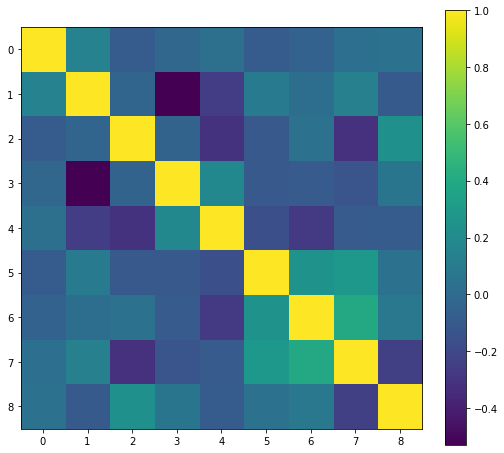

In [30]:
fig,ax = mlp.subplots(figsize=(8,8))
im=ax.imshow(pear_corr)
fig.colorbar(im,orientation='vertical', fraction = 0.05)

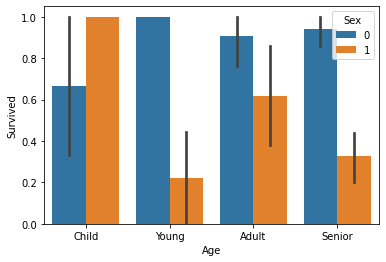

In [31]:
ax=sns.barplot(x=df['Age_group'],y=df['Survived'],hue=df['Sex'])
ax.set(xlabel='Age',ylabel='Survived')
mlp.show()

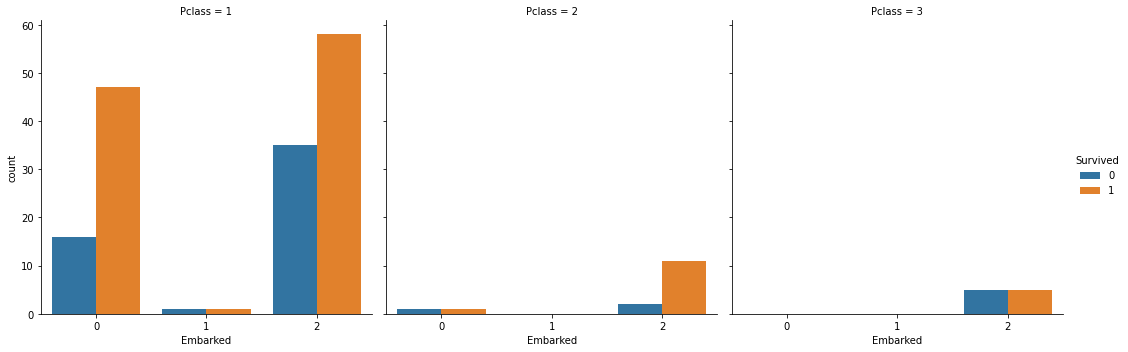

In [34]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)

In [35]:
survived_class=df.groupby('Pclass')['Survived'].count()
survived_class.to_frame('Survivers')

,Survivers
Pclass,
1,158
2,15
3,10


In [ ]:
colors = sns.color_palette('pastel')[0:5]
labels=["Class1","Class2","Class3"]
#create pie chart
mlp.pie(survived_class,labels=labels,colors=colors,autopct='%.0f%%')
mlp.show()

In [ ]:
df['Family_members']=df['Parch']+df['SibSp']
df['Family_members']

In [ ]:
sns.barplot(x =df['Family_members'], y =df['Survived'])


In [ ]:
survived_people=df.groupby('Survived').median()
survived_people

In [ ]:
sns.pairplot(df, hue="Survived", height=2.5)
mlp.show()